# Чтение данных

In [40]:
import pandas as pd
import os 
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
#file = np.array(glob.glob('C:\\Users\\diens\\OneDrive\\Рабочий стол\\data\\data.csv'))

In [42]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [43]:
file = '/content/drive/MyDrive/data.csv'

## Предварительные преобразования и анализ данных

In [45]:
df = pd.read_csv(file, low_memory=False, skiprows=lambda x:x%5!=0)

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.00,0.3,24.36,2.5
1,1.0,2021-01-01 00:26:12,2021-01-01 00:39:46,2.0,2.70,1.0,N,263,142,1.0,12.0,3.0,0.5,3.15,0.00,0.3,18.95,2.5
2,2.0,2021-01-01 00:42:11,2021-01-01 00:44:24,5.0,0.81,1.0,N,50,142,2.0,4.5,0.5,0.5,0.00,0.00,0.3,8.30,2.5
3,2.0,2021-01-01 00:18:36,2021-01-01 00:27:10,2.0,1.66,1.0,N,151,142,2.0,8.5,0.5,0.5,0.00,0.00,0.3,12.30,2.5
4,1.0,2021-01-01 00:37:40,2021-01-01 01:04:46,2.0,19.10,1.0,N,132,3,2.0,52.0,0.5,0.5,0.00,6.12,0.3,59.42,0.0


In [ ]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [46]:
df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]] = df[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].apply(pd.to_datetime, utc=False)

In [ ]:
df.store_and_fwd_flag.isna().sum()

166807

In [ ]:
df.store_and_fwd_flag.value_counts()

N    2800483
Y      32850
Name: store_and_fwd_flag, dtype: int64

In [7]:
df.store_and_fwd_flag = df.store_and_fwd_flag.map(dict(Y=1, N=0))

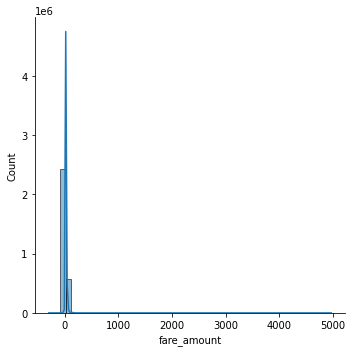

In [ ]:
sns.displot(df, x="fare_amount", kde=True, bins=50)

In [ ]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,2.833333e+06,2.833333e+06,3.000140e+06,2.833333e+06,2.833333e+06,3.000140e+06,3.000140e+06,2.833333e+06,3.000140e+06,3.000140e+06,3.000140e+06,3.000140e+06,3.000140e+06,3.000140e+06,3.000140e+06,3.000140e+06
mean,1.687190e+00,1.424628e+00,6.791536e+00,1.044819e+00,1.159412e-02,1.654064e+02,1.623027e+02,1.257773e+00,1.285592e+01,1.046986e+00,4.928905e-01,2.149018e+00,3.186816e-01,2.971051e-01,1.872106e+01,2.202747e+00
std,4.636379e-01,1.043548e+00,7.050739e+02,7.404084e-01,1.070500e-01,6.700480e+01,7.123336e+01,4.776961e-01,1.226227e+01,1.252534e+00,7.599490e-02,2.584949e+00,1.587060e+00,4.108432e-02,1.438546e+01,8.378298e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.995000e+02,-5.500000e+00,-5.000000e-01,-1.111000e+02,-2.375000e+01,-3.000000e-01,-3.145500e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.060000e+00,1.000000e+00,0.000000e+00,1.250000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.790000e+00,1.000000e+00,0.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.960000e+00,0.000000e+00,3.000000e-01,1.475000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,3.200000e+00,1.000000e+00,0.000000e+00,2.360000e+02,2.360000e+02,1.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,2.030000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,3.325322e+05,9.900000e+01,1.000000e+00,2.650000e+02,2.650000e+02,5.000000e+00,4.969000e+03,8.881000e+01,3.850000e+00,3.333300e+02,6.639100e+02,3.000000e-01,4.973300e+03,2.750000e+00


In [ ]:
df.isnull().sum()

VendorID                 166807
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          166807
trip_distance                 0
RatecodeID               166807
store_and_fwd_flag       166807
PULocationID                  0
DOLocationID                  0
payment_type             166807
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
dtype: int64

In [ ]:
df[df.VendorID.isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
254282,NaN,2021-01-01 11:01:48,2021-01-01 11:01:04,NaN,1.68,NaN,NaN,265,36,NaN,24.94,0.00,0.5,0.00,0.0,0.3,25.74,0.0
254283,NaN,2021-01-01 11:25:00,2021-01-01 11:34:00,NaN,2.04,NaN,NaN,231,234,NaN,9.57,0.00,0.5,2.10,0.0,0.3,14.97,2.5
254284,NaN,2021-01-01 11:25:11,2021-01-01 11:34:23,NaN,2.50,NaN,NaN,107,231,NaN,10.00,0.00,0.5,1.33,0.0,0.3,14.63,2.5
254285,NaN,2021-01-01 11:14:00,2021-01-01 11:27:00,NaN,4.70,NaN,NaN,250,254,NaN,25.45,0.00,0.5,2.75,0.0,0.3,29.00,0.0
254286,NaN,2021-01-01 11:39:00,2021-01-01 11:44:00,NaN,0.76,NaN,NaN,250,248,NaN,12.67,0.00,0.5,2.75,0.0,0.3,16.22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000135,NaN,2021-07-09 18:06:00,2021-07-09 18:22:00,NaN,4.68,NaN,NaN,185,259,NaN,20.66,2.75,0.5,0.00,0.0,0.3,24.21,0.0
3000136,NaN,2021-07-09 18:07:33,2021-07-09 19:07:59,NaN,3.50,NaN,NaN,265,258,NaN,29.06,0.00,0.5,0.00,0.0,0.3,29.86,0.0
3000137,NaN,2021-07-09 18:57:12,2021-07-09 19:11:31,NaN,3.28,NaN,NaN,143,249,NaN,16.05,0.00,0.5,4.13,0.0,0.3,23.48,2.5
3000138,NaN,2021-07-09 18:25:00,2021-07-09 18:48:00,NaN,4.19,NaN,NaN,238,116,NaN,20.06,2.75,0.5,0.00,0.0,0.3,23.61,0.0


In [ ]:
df.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.164516,0.018958,0.002994,-0.151297,-0.006879,0.001024,-0.018266,0.000595,-0.866970,-0.033558,0.024078,0.002227,-0.046084,0.004948,0.001903
passenger_count,0.164516,1.000000,0.019118,-0.002252,-0.026811,-0.005629,-0.003783,0.000090,0.014563,-0.136569,0.005829,0.009127,0.011857,0.005817,0.016150,0.008000
trip_distance,0.018958,0.019118,1.000000,0.125137,-0.003969,-0.003528,-0.001953,-0.008453,0.012520,0.004809,0.000367,-0.000325,0.012403,0.000505,0.011974,-0.012497
RatecodeID,0.002994,-0.002252,0.125137,1.000000,0.012828,-0.009420,0.008134,0.006946,0.197270,-0.016015,-0.137238,0.100927,0.131085,-0.026662,0.193472,-0.086707
store_and_fwd_flag,-0.151297,-0.026811,-0.003969,0.012828,1.000000,0.001937,0.003319,0.014723,0.001481,0.126562,0.001124,-0.011021,-0.000858,0.003895,-0.001394,-0.010254
PULocationID,-0.006879,-0.005629,-0.003528,-0.009420,0.001937,1.000000,0.090422,-0.035494,-0.082111,0.000192,0.004592,-0.023413,-0.061460,0.001437,-0.076787,0.141363
DOLocationID,0.001024,-0.003783,-0.001953,0.008134,0.003319,0.090422,1.000000,-0.040175,-0.098897,0.008382,0.007288,-0.009148,-0.052060,-0.000643,-0.085385,0.151923
payment_type,-0.018266,0.000090,-0.008453,0.006946,0.014723,-0.035494,-0.040175,1.000000,-0.049649,-0.026550,-0.276928,-0.455111,-0.019204,-0.306450,-0.145508,-0.236409
fare_amount,0.000595,0.014563,0.012520,0.197270,0.001481,-0.082111,-0.098897,-0.049649,1.000000,0.033032,0.022731,0.394143,0.502832,0.131207,0.975545,-0.299161
extra,-0.866970,-0.136569,0.004809,-0.016015,0.126562,0.000192,0.008382,-0.026550,0.033032,1.000000,0.083103,-0.006505,0.037028,0.076559,0.055504,0.076828


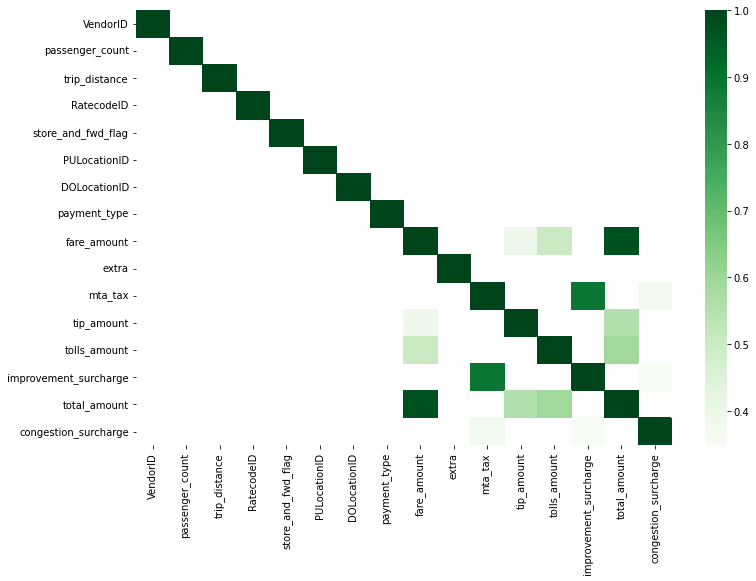

In [ ]:
corr = df.corr()

kot = corr[corr>=.3]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [47]:
from datetime import datetime

In [48]:
df['pickup_day_no'] = df['tpep_pickup_datetime'].dt.weekday
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

In [49]:
df['duration'] = (df.tpep_dropoff_datetime-df.tpep_pickup_datetime)/np.timedelta64(1, 'm')

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day_no,pickup_hour,pickup_month,duration
0,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,0.0,68,33,1.0,...,0.5,4.06,0.00,0.3,24.36,2.5,4,0,1,16.533333
1,1.0,2021-01-01 00:26:12,2021-01-01 00:39:46,2.0,2.70,1.0,0.0,263,142,1.0,...,0.5,3.15,0.00,0.3,18.95,2.5,4,0,1,13.566667
2,2.0,2021-01-01 00:42:11,2021-01-01 00:44:24,5.0,0.81,1.0,0.0,50,142,2.0,...,0.5,0.00,0.00,0.3,8.30,2.5,4,0,1,2.216667
3,2.0,2021-01-01 00:18:36,2021-01-01 00:27:10,2.0,1.66,1.0,0.0,151,142,2.0,...,0.5,0.00,0.00,0.3,12.30,2.5,4,0,1,8.566667
4,1.0,2021-01-01 00:37:40,2021-01-01 01:04:46,2.0,19.10,1.0,0.0,132,3,2.0,...,0.5,0.00,6.12,0.3,59.42,0.0,4,0,1,27.100000


In [50]:
df = df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [15]:
df.VendorID.value_counts()

2.0    1947037
1.0     886296
Name: VendorID, dtype: int64

In [51]:
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())  

In [52]:
df = df.fillna(0)

In [ ]:
df.isnull().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_day_no            0
pickup_hour              0
pickup_month             0
duration                 0
dtype: int64

In [ ]:
def find_outliers(column):
    return column[np.abs(column-column.mean()) > (3*column.std())]

In [ ]:
def kdeplot(df, column):
    sns.kdeplot(data=df, x=column, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)

In [53]:
names = ['duration', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']

In [54]:
for col in names:
    df[col].values[df[col] < 0] = df[col].median()

## Анализ целевой переменной

In [17]:
df['fare_amount'].skew()

26.455729974350504

Text(0.5, 1.0, 'Fare amount distribution')

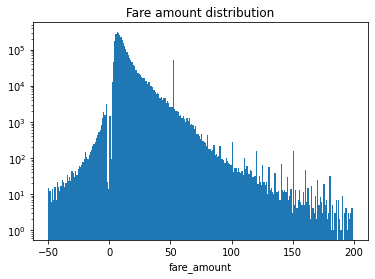

In [ ]:
plt.hist(df['fare_amount'], 
         bins=np.arange(-50, 200),
         log=True)
plt.xlabel('fare_amount')
plt.title('Fare amount distribution')

In [55]:
def clip(df, a, b, col):
    for c in col:
        df = df[(df[c]>a) & (df[c]<b)]
    return df

In [56]:
df = clip(df, 1, 200, ['fare_amount'])

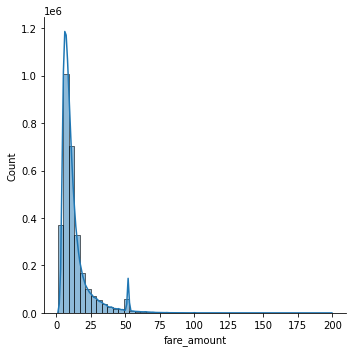

In [ ]:
sns.displot(df, x="fare_amount", kde=True, bins=50)

In [18]:
fare1 = pd.DataFrame((np.log1p(df['fare_amount'])).to_numpy(), columns=["fare_amount"])

In [21]:
fare1.skew()

fare_amount    0.901751
dtype: float64

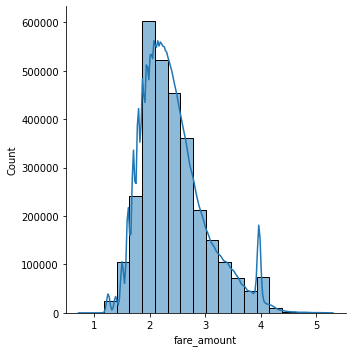

In [22]:
sns.displot(fare1, x="fare_amount", kde=True, bins=20)

In [57]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, QuantileTransformer

In [58]:
pt = PowerTransformer()

In [59]:
pt.fit(df[["fare_amount"]])

PowerTransformer()

In [60]:
pt.transform(df[["fare_amount"]])

array([[ 0.86976586],
       [ 0.40337869],
       [-1.49944282],
       ...,
       [ 0.83201914],
       [ 1.1223107 ],
       [ 0.76272226]])

In [61]:
fare2 = pd.DataFrame(pt.transform(df[["fare_amount"]]), columns=["fare_amount"])

In [28]:
fare2.skew()

fare_amount    0.050493
dtype: float64

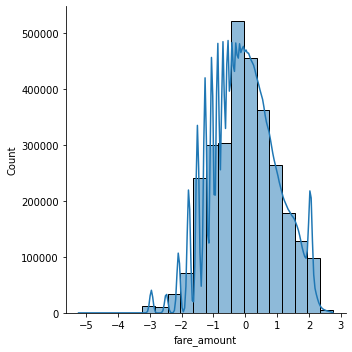

In [ ]:
sns.displot(fare2, x="fare_amount", kde=True, bins=20)

In [ ]:
qt = QuantileTransformer(random_state=42)
qt.fit_transform(df[["fare_amount"]])

array([[0.8013013 ],
       [0.66466466],
       [0.06156156],
       ...,
       [0.79590058],
       [0.85615616],
       [0.77400734]])

In [ ]:
fare3 = pd.DataFrame(qt.transform(df[["fare_amount"]]), columns=["fare_amount"])

In [ ]:
fare3.values

array([[0.8013013 ],
       [0.66466466],
       [0.06156156],
       ...,
       [0.79590058],
       [0.85615616],
       [0.77400734]])

In [ ]:
fare3.skew()

fare_amount    0.003976
dtype: float64

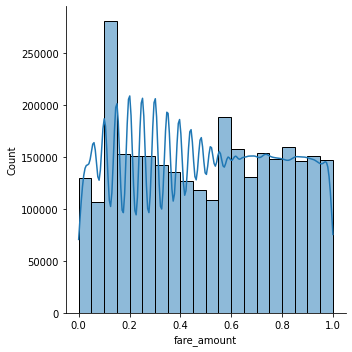

In [ ]:
sns.displot(fare3, x="fare_amount", kde=True, bins=20)

In [62]:
y = df["fare_amount"].values
#y_transformed = fare3.values.ravel()
y_transformed = fare2.values.ravel()

In [63]:
X = df.drop(columns=["fare_amount"])

In [64]:
X = pd.get_dummies(X,columns=['VendorID', 'RatecodeID', 'payment_type'])

In [65]:
X = pd.get_dummies(X, columns=['store_and_fwd_flag'], drop_first=True)

In [66]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Sklearn

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_predict, cross_val_score, \
    RandomizedSearchCV, KFold

## Skopt/SGDRegressor

In [68]:
pip install scikit-optimize

In [69]:
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split

In [33]:
opt = BayesSearchCV(
    SGDRegressor(random_state=42, max_iter=5000),
    {
        'penalty': ['elasticnet'],
        'alpha': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
        'l1_ratio':  list(np.arange(0, 0.5, 0.1)),
        'loss':['huber', 'squared_error'],
    },
    cv=3
)

In [ ]:
opt.fit(X, y)

In [ ]:
opt.best_params_

In [32]:
mysgdr = SGDRegressor(random_state=42, alpha= 0.001, l1_ratio=0.3, loss="huber", penalty="elasticnet")

In [33]:
mysgdr.fit(X, y)

SGDRegressor(alpha=0.001, l1_ratio=0.3, loss='huber', penalty='elasticnet',
             random_state=42)

In [34]:
y_pred = cross_val_predict(mysgdr, X, y)

In [35]:
mean_squared_error(y, y_pred)

0.16171847212038215

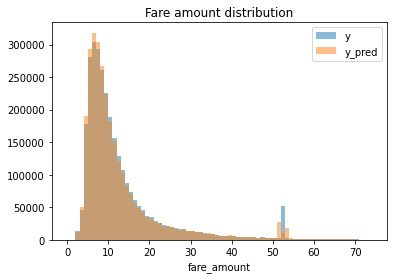

In [44]:
plt.hist(y, bins=np.arange(0, 75), alpha=0.5, label='y')
plt.hist(y_pred, bins=np.arange(0, 75), alpha=0.5, label='y_pred')
plt.legend(loc='upper right')
plt.xlabel('fare_amount')
plt.title('Fare amount distribution')
plt.show()

## Skopt/DecisionTreeRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
opt_tree = BayesSearchCV(
    DecisionTreeRegressor(random_state=42),
    {
        'max_depth':list(range(1, 10)),
        'min_samples_split':list(range(2, 100, 5)),
    },
    cv=3
)

In [32]:
opt_tree.fit(X, y_transformed)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

BayesSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
              search_spaces={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                             'min_samples_split': [2, 7, 12, 17, 22, 27, 32, 37,
                                                   42, 47, 52, 57, 62, 67, 72,
                                                   77, 82, 87, 92, 97]})

In [33]:
opt_tree.best_params_

OrderedDict([('max_depth', 9), ('min_samples_split', 7)])

In [36]:
tree = DecisionTreeRegressor(random_state=42, max_depth=9, min_samples_split=7)

In [37]:
tree.fit(X, y_transformed)

DecisionTreeRegressor(max_depth=9, min_samples_split=7, random_state=42)

In [38]:
y_pred_tree = cross_val_predict(tree, X, y_transformed)

In [39]:
#y_pred_tree = qt.inverse_transform([[el] for el in y_pred_tree])
y_pred_tree = pt.inverse_transform([[el] for el in y_pred_tree])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"


In [40]:
mean_squared_error(y, y_pred_tree)

1.762461605389471

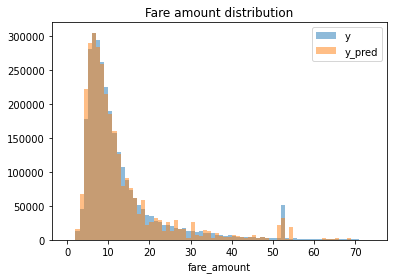

In [45]:
plt.hist(y, bins=np.arange(0, 75), alpha=0.5, label='y')
plt.hist(y_pred_tree, bins=np.arange(0, 75), alpha=0.5, label='y_pred')
plt.legend(loc='upper right')
plt.xlabel('fare_amount')
plt.title('Fare amount distribution')
plt.show()
print(mean_squared_error(y, y_pred_tree))

###Skopt/RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
regr = RandomForestRegressor(n_estimators=7, max_depth=9, random_state=42, min_samples_split=7, n_jobs=-1)

In [82]:
regr.fit(X, y_transformed)

RandomForestRegressor(max_depth=9, min_samples_split=7, n_estimators=7,
                      n_jobs=-1, random_state=42)

In [83]:
y_pred_forest = cross_val_predict(regr, X, y_transformed)

In [84]:
y_pred_forest = pt.inverse_transform([[el] for el in y_pred_forest])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"


In [85]:
mean_squared_error(y, y_pred_forest)

1.5262688863344445

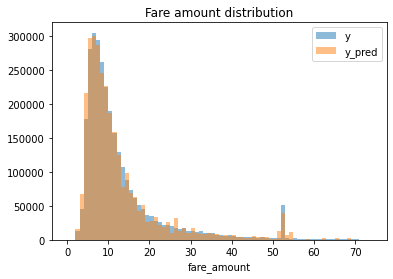

In [86]:
plt.hist(y, bins=np.arange(0, 75), alpha=0.5, label='y')
plt.hist(y_pred_forest, bins=np.arange(0, 75), alpha=0.5, label='y_pred')
plt.legend(loc='upper right')
plt.xlabel('fare_amount')
plt.title('Fare amount distribution')
plt.show()

### Catboost

In [31]:
pip install catboost

     |████████████████████████████████| 76.6 MB 67 kB/s 


In [32]:
from catboost import CatBoostRegressor

In [38]:
grid_opt = {
    'iterations': list(range(1, 2000)),
    'depth': list(range(1,12)),
    'learning_rate': list(np.arange(0, 1, 0.1)),
    'random_strength': list(np.arange(1e-9, 10,0.1)), 
    'bagging_temperature': list(np.arange(0.0, 1.0,0.1)), 
    'l2_leaf_reg': list(range(2, 100)), 
   }

In [39]:
reg = CatBoostRegressor(verbose = False)

In [72]:
opt = BayesSearchCV(estimator=reg,                                    
                    search_spaces=grid_opt,                                                    
                    cv=5,                                           
                    n_iter=60,                                        # max number of trials
                    n_points=3,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=-1,                                        # number of jobs                                      # if not iid it optimizes on the cv score
                    return_train_score=False,                         
                    refit=False,                                             # optmizer parameters: we use Gaussian Process (GP)
                    random_state=42)                                   # random state for replicability

In [85]:
 model = CatBoostRegressor(iterations=400, max_depth=10)

In [86]:
model.fit(X, y_transformed)

Learning rate set to 0.305303
0:	learn: 0.7125961	total: 1.23s	remaining: 8m 10s
1:	learn: 0.5109500	total: 2.49s	remaining: 8m 16s
2:	learn: 0.3710354	total: 3.87s	remaining: 8m 32s
3:	learn: 0.2737240	total: 5.25s	remaining: 8m 40s
4:	learn: 0.2079290	total: 7.05s	remaining: 9m 17s
5:	learn: 0.1647586	total: 9.33s	remaining: 10m 12s
6:	learn: 0.1362284	total: 11.3s	remaining: 10m 35s
7:	learn: 0.1168555	total: 13.1s	remaining: 10m 44s
8:	learn: 0.1043195	total: 14.7s	remaining: 10m 37s
9:	learn: 0.0961763	total: 16s	remaining: 10m 24s
10:	learn: 0.0909237	total: 17.6s	remaining: 10m 22s
11:	learn: 0.0872094	total: 18.5s	remaining: 9m 58s
12:	learn: 0.0836795	total: 19.4s	remaining: 9m 37s
13:	learn: 0.0811887	total: 20.3s	remaining: 9m 19s
14:	learn: 0.0791191	total: 21.2s	remaining: 9m 3s
15:	learn: 0.0769201	total: 22.1s	remaining: 8m 50s
16:	learn: 0.0753556	total: 23s	remaining: 8m 38s
17:	learn: 0.0742004	total: 23.9s	remaining: 8m 27s
18:	learn: 0.0725725	total: 24.8s	remaining

In [87]:
catboost_preds = cross_val_predict(model, X, y_transformed, cv=3)

Learning rate set to 0.286357
0:	learn: 0.7287424	total: 606ms	remaining: 4m 1s
1:	learn: 0.5347967	total: 1.19s	remaining: 3m 56s
2:	learn: 0.3966323	total: 1.78s	remaining: 3m 55s
3:	learn: 0.2989312	total: 2.37s	remaining: 3m 55s
4:	learn: 0.2299147	total: 2.98s	remaining: 3m 55s
5:	learn: 0.1812730	total: 3.59s	remaining: 3m 55s
6:	learn: 0.1484255	total: 4.21s	remaining: 3m 56s
7:	learn: 0.1252372	total: 4.79s	remaining: 3m 54s
8:	learn: 0.1101541	total: 5.39s	remaining: 3m 54s
9:	learn: 0.1002578	total: 5.97s	remaining: 3m 53s
10:	learn: 0.0932226	total: 6.56s	remaining: 3m 51s
11:	learn: 0.0886911	total: 7.13s	remaining: 3m 50s
12:	learn: 0.0851587	total: 7.72s	remaining: 3m 49s
13:	learn: 0.0825273	total: 8.3s	remaining: 3m 48s
14:	learn: 0.0796716	total: 8.89s	remaining: 3m 48s
15:	learn: 0.0777274	total: 9.47s	remaining: 3m 47s
16:	learn: 0.0761724	total: 10.1s	remaining: 3m 46s
17:	learn: 0.0746917	total: 10.6s	remaining: 3m 45s
18:	learn: 0.0731217	total: 11.2s	remaining: 3

In [89]:
catboost_preds = pt.inverse_transform([[el] for el in catboost_preds])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  "X does not have valid feature names, but"


In [91]:
mean_squared_error(y, catboost_preds)

0.9896385823139546

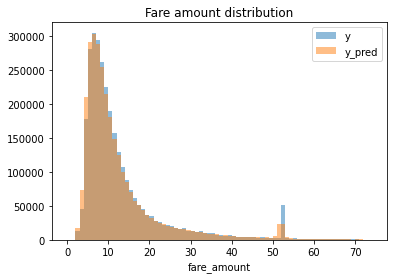

In [90]:
plt.hist(y, bins=np.arange(0, 75), alpha=0.5, label='y')
plt.hist(catboost_preds, bins=np.arange(0, 75), alpha=0.5, label='y_pred')
plt.legend(loc='upper right')
plt.xlabel('fare_amount')
plt.title('Fare amount distribution')
plt.show()